In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy import misc
from PIL import Image
import cv2
import sys
from copy import deepcopy
from ipywidgets import widgets
from IPython.display import display

sys.setrecursionlimit(1000000000)

In [2]:
print(dir(widgets.Output))

['_Output__counter', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_notifiers', '_append_stream_output', '_call_widget_constructed', '_comm_changed', '_compare', '_default_keys', '_display_callbacks', '_dom_classes', '_flush', '_gen_repr_from_keys', '_get_embed_state', '_handle_custom_msg', '_handle_displayed', '_handle_msg', '_holding_sync', '_ipython_display_', '_is_numpy', '_lock_property', '_log_default', '_model_module', '_model_module_version', '_model_name', '_msg_callbacks', '_notify_trait', '_property_lock', '_register_validator', '_remove_notifiers', '_repr_keys', '_send', '_should_send_property', '_states_to_se

(825, 1100)


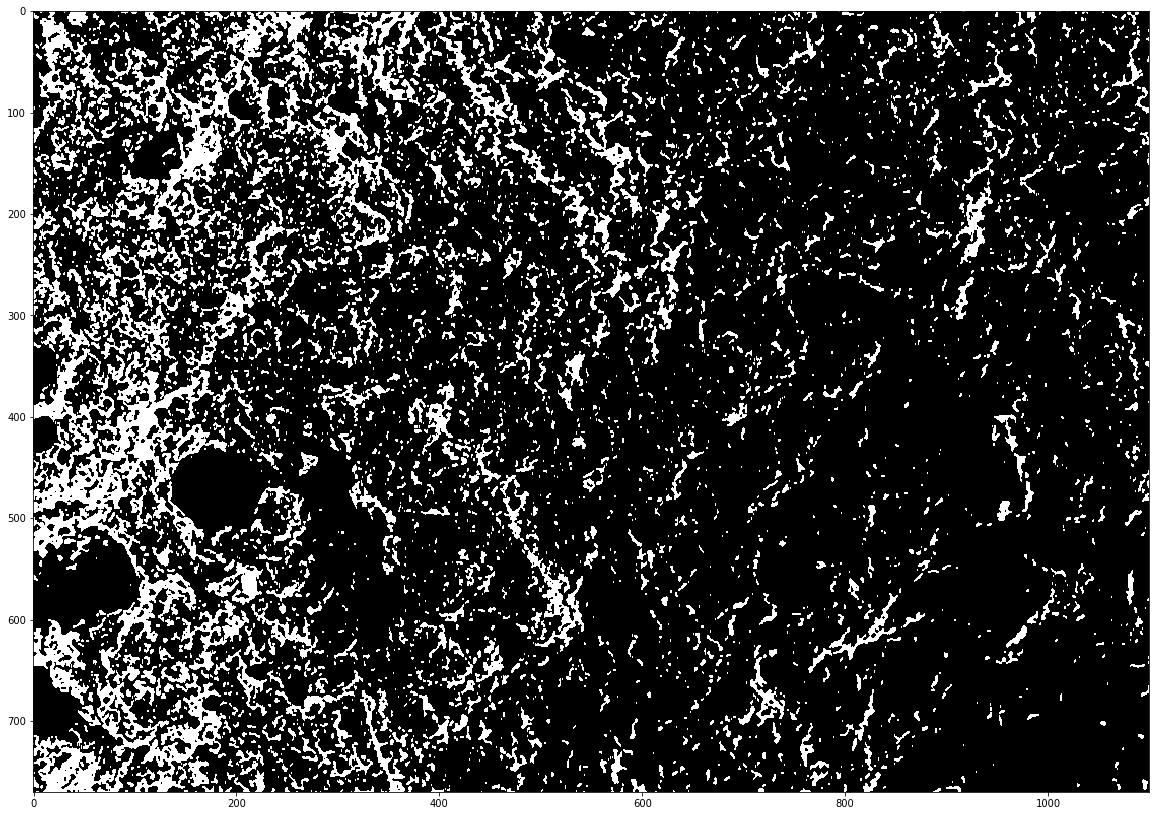

In [20]:
# {0, 33, 66, 99, 140, 173, 206, 239, 16, 49, 82, 123, 156, 189, 222, 255}
# {0, 33, 66, 99, 132, 173, 206, 239, 16, 49, 82, 115, 156, 189, 222, 255}
image = cv2.imread("../data.tif", -1)
print(image.shape)

plt.figure(figsize = (20, 20))
smooth = image[:770, :]
# smooth = cv2.GaussianBlur(smooth, (9, 9), 0)
# # smooth = cv2.erode(smooth, (3, 3))
# smooth = cv2.medianBlur(smooth, 3)
# ret, smooth = cv2.threshold(smooth, 80, 1, cv2.THRESH_BINARY)

# smooth = cv2.erode(smooth, (3, 3))
# smooth = cv2.dilate(smooth, (5, 5))
# smooth = cv2.GaussianBlur(smooth, (5, 5), 0)

ret, smooth = cv2.threshold(smooth, 200, 1, cv2.THRESH_BINARY)
smooth = cv2.medianBlur(smooth, 3)
smooth = cv2.morphologyEx(smooth, cv2.MORPH_OPEN, (3,3))

plt.imshow(image[:770, :], cmap = 'gray')
# plt.imshow(smooth, alpha = 0.5)
plt.imshow(smooth, cmap = 'gray')
plt.show()

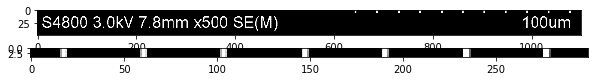

[43, 44, 44, 43, 44, 44, 43, 44, 44, 43, 44, 44, 43, 44, 44]
43


In [21]:
scale = image[775:780, 800:]

plt.figure(figsize = (10, 1))

ax = plt.subplot(2, 1, 1)
plt.imshow(image[775:], cmap = 'gray')

ax = plt.subplot(2, 1, 2)
plt.imshow(scale, cmap = 'gray')
plt.show()


a = []
for row in scale:
    l = len(row)
    cnt = 0
    flag = False
    for i in range(l - 1):
        #print("i:%d row[i]:%d cnt:%d"%(i, row[i], cnt))
        if row[i] == 255 and row[i + 1] != 255:
            if flag == True:
                flag = False
                a.append(cnt)
                cnt = 0
            else:
                flag = True
        if flag == True:
            cnt += 1
            

print(a)
rule = int(np.mean(a))
print(rule)
    

In [22]:
fx = [[0, 1], [1, 0], [0, -1], [-1, 0]]
shape = smooth.shape

def dfs(x, y):
    if x >= shape[0] or x < 0 or y >= shape[1] or y < 0 or smooth[x][y] == 1:
        return 0, 0, 0
    s = list()
    ans = 0
    xsum = 0
    ysum = 0
    s.append([x, y])
    while (s != []):
        x, y = s.pop()
        if x >= shape[0] or x < 0 or y >= shape[1] or y < 0 or smooth[x][y] == 1:
            continue
        smooth[x][y] = 1
        ans += 1
        xsum += x
        ysum += y
        for i in range(4):
            s.append([x + fx[i][0], y + fx[i][1]])
            
    
    return ans, xsum, ysum
      

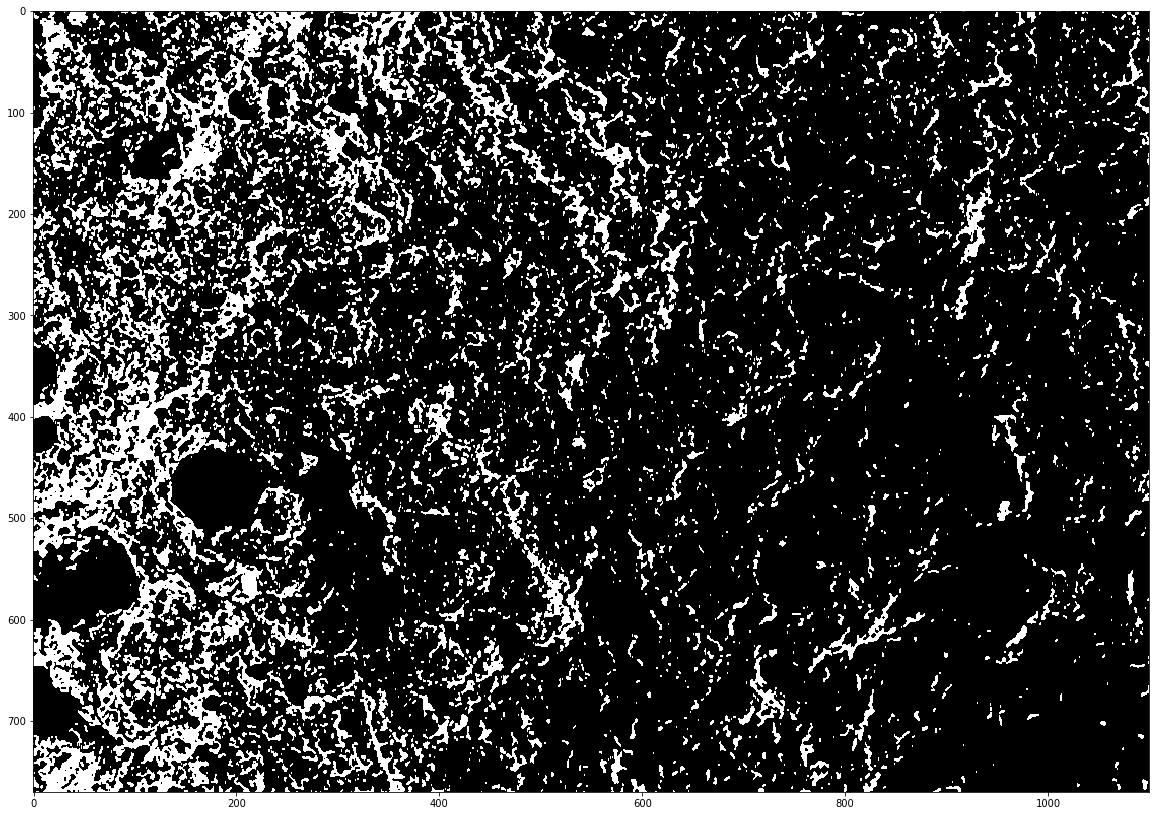

(770, 1100)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
It was finished!
[[1, 388, 595, 690253], [2, 0, 172, 10], [3, 7, 225, 117], [4, 2, 225, 12], [5, 3, 239, 15], [6, 2, 251, 17], [7, 0, 326, 10], [8, 5, 337, 165], [9, 4, 363, 28], [10, 1, 374, 15], [11, 1, 1083, 23], [12, 10, 348, 42], [13, 9, 40, 6], [14, 17, 218, 15], [15, 25, 19, 42], [16, 23, 223, 9], [17, 24, 324, 8], [18, 34, 308, 8], [19, 36, 318, 27], [20, 51, 199, 19], [21, 57, 266, 9], [22, 59, 428, 10], [23, 66, 21, 41], [24, 69, 58, 10], [25, 72, 174, 57], [26, 69, 218, 9], [27, 69, 338, 20], [28, 70, 959, 9], [29, 76, 12, 23], [30, 75, 26, 27], [31, 83, 125, 103], [32, 78, 439, 23], [33, 80, 120, 18], [34, 81, 35, 26], [35, 86, 437, 15], [36, 95, 184, 19], [37, 98, 162, 16], [38, 99, 451, 13], [39, 102, 533, 5], [40, 104, 536, 5], [41, 111, 229, 5], [42, 115, 160, 8], [43, 117, 178, 22], [44, 119, 379, 12], [45, 120, 166, 12], [46, 123, 316, 36

In [23]:
img = deepcopy(smooth)

plt.figure(figsize = (20, 20))
plt.imshow(image[:770, :], cmap = 'gray')
# plt.imshow(smooth, alpha = 0.5)
plt.imshow(smooth, cmap = 'gray')
plt.show()

shape = smooth.shape
print(shape)
print(smooth)
res = []
cnt = 0
for i in range(shape[0]):
    for j in range(shape[1]):
        if smooth[i][j] == 0:
            ans, x, y = dfs(i, j)
            if (ans <= 4): continue
            cnt += 1
            res.append([cnt, x//ans, y//ans, ans])
        
print("It was finished!")

print(res)

In [24]:
lower = 3000
upper = 300000000

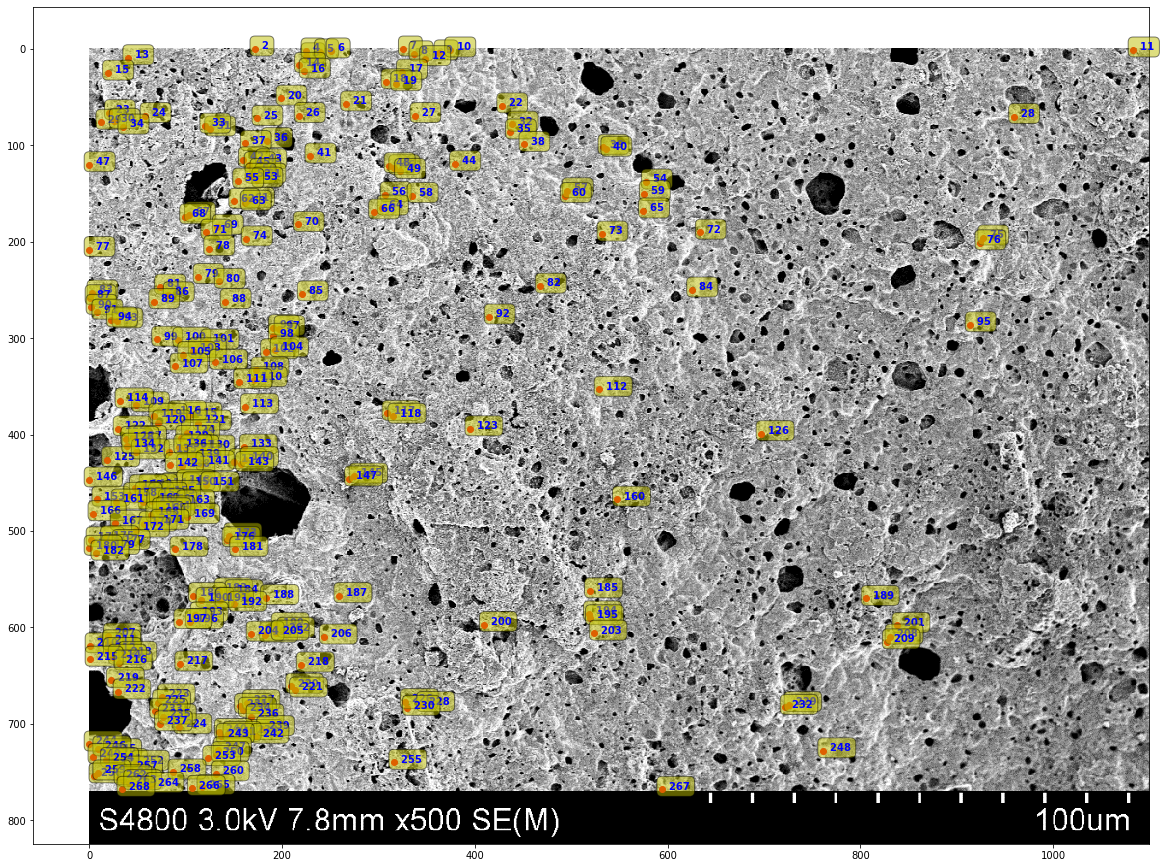

    2: ( 172,    0)    18490 um^2
    3: ( 225,    7)   216333 um^2
    4: ( 225,    2)    22188 um^2
    5: ( 239,    3)    27735 um^2
    6: ( 251,    2)    31433 um^2
    7: ( 326,    0)    18490 um^2
    8: ( 337,    5)   305085 um^2
    9: ( 363,    4)    51772 um^2
   10: ( 374,    1)    27735 um^2
   11: (1083,    1)    42527 um^2
   12: ( 348,   10)    77658 um^2
   13: (  40,    9)    11094 um^2
   14: ( 218,   17)    27735 um^2
   15: (  19,   25)    77658 um^2
   16: ( 223,   23)    16641 um^2
   17: ( 324,   24)    14792 um^2
   18: ( 308,   34)    14792 um^2
   19: ( 318,   36)    49923 um^2
   20: ( 199,   51)    35131 um^2
   21: ( 266,   57)    16641 um^2
   22: ( 428,   59)    18490 um^2
   23: (  21,   66)    75809 um^2
   24: (  58,   69)    18490 um^2
   25: ( 174,   72)   105393 um^2
   26: ( 218,   69)    16641 um^2
   27: ( 338,   69)    36980 um^2
   28: ( 959,   70)    16641 um^2
   29: (  12,   76)    42527 um^2
   30: (  26,   75)    49923 um^2
   31: ( 125, 

In [25]:
res = np.array(res)
plt.figure(figsize = (20, 20))

plt.imshow(image, cmap = 'gray')

for i in res:
    if i[3] >= lower/(rule * rule) and i[3] <= upper/(rule * rule):
        plt.annotate("  " + str(i[0]), xy = (i[2],i[1]), color = 'b', weight = "black", 
                     bbox = dict(boxstyle = 'round,  pad = 0.5', fc = 'y', ec = 'k', lw = 1, alpha = 0.5))
        plt.scatter(i[2], i[1], color = "r", alpha = 1)
        
plt.show()


for i in res:
    if i[3] >= lower/(rule * rule) and i[3] <= upper/(rule * rule):
        print("%5d: (%4d, %4d)  %7d um^2"%(i[0], i[2],i[1], i[3] * rule * rule))